In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 50
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    print("TRUE")
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train=x_train[:20000]
y_train=y_train[:20000]
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape[0], 'train labels')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (20000, 28, 28, 1)
20000 train samples
10000 test samples
20000 train labels


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 20000 samples, validate on 10000 samples
Epoch 1/12
35s - loss: 0.4704 - acc: 0.8544 - val_loss: 0.1329 - val_acc: 0.9587
Epoch 2/12
34s - loss: 0.1622 - acc: 0.9524 - val_loss: 0.0828 - val_acc: 0.9742
Epoch 3/12
34s - loss: 0.1206 - acc: 0.9630 - val_loss: 0.0717 - val_acc: 0.9776
Epoch 4/12
34s - loss: 0.1021 - acc: 0.9678 - val_loss: 0.0611 - val_acc: 0.9804
Epoch 5/12
35s - loss: 0.0814 - acc: 0.9758 - val_loss: 0.0595 - val_acc: 0.9816
Epoch 6/12
34s - loss: 0.0711 - acc: 0.9783 - val_loss: 0.0520 - val_acc: 0.9825
Epoch 7/12
34s - loss: 0.0620 - acc: 0.9823 - val_loss: 0.0506 - val_acc: 0.9839
Epoch 8/12
35s - loss: 0.0582 - acc: 0.9820 - val_loss: 0.0498 - val_acc: 0.9846
Epoch 9/12
34s - loss: 0.0541 - acc: 0.9833 - val_loss: 0.0458 - val_acc: 0.9847
Epoch 10/12
34s - loss: 0.0495 - acc: 0.9851 - val_loss: 0.0441 - val_acc: 0.9863
Epoch 11/12
34s - loss: 0.0455 - acc: 0.9859 - val_loss: 0.0449 - val_acc: 0.9851
Epoch 12/12
35s - loss: 0.0397 - acc: 0.9887 - val_loss: 

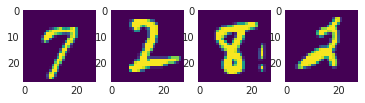

In [5]:
from matplotlib import pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

sns.set_style("dark")

%matplotlib inline
fig, axes = plt.subplots(1, 4)
for i in range(4):
    img_index = int(random.random()*20000)
    axes[i].imshow(x_train[img_index, :, :, 0],cmap="viridis")

In [6]:
def array_to_sprite_atlas(image_array, num_sprites_x, num_sprites_y):
    "Takes an array of images of shape (num_images, img_width, img_height) and splices them together to form a big ass mosaic (sprite atlas)."
    # Mnist arrays are in 0-1 range, PIL needs 0-255
    image_array = image_array * 255
    image_width, image_height = image_array.shape[1], image_array.shape[2]
    atlas_width  = num_sprites_x * image_width
    atlas_height = num_sprites_y * image_height
    # We paste the samples to get indices arranged in the following way:
    # | 0 | 1 | 2 | 3 |
    # | 4 | 5 | 6 | 7 |
    atlas  = Image.new("RGB", (atlas_width, atlas_height), (0, 0, 0))
    for i in range(num_sprites_y): 
        for j in range(num_sprites_x):
            sample = image_array[num_sprites_x * i + j, :, :]
            image = Image.fromarray(sample)
            atlas.paste(image, (j*image_width, i*image_height))
    return atlas

In [7]:
atlas = array_to_sprite_atlas(x_test.reshape(x_test.shape[0], 28, 28), 100, 100)
atlas.save("atlas.jpg", "JPEG")

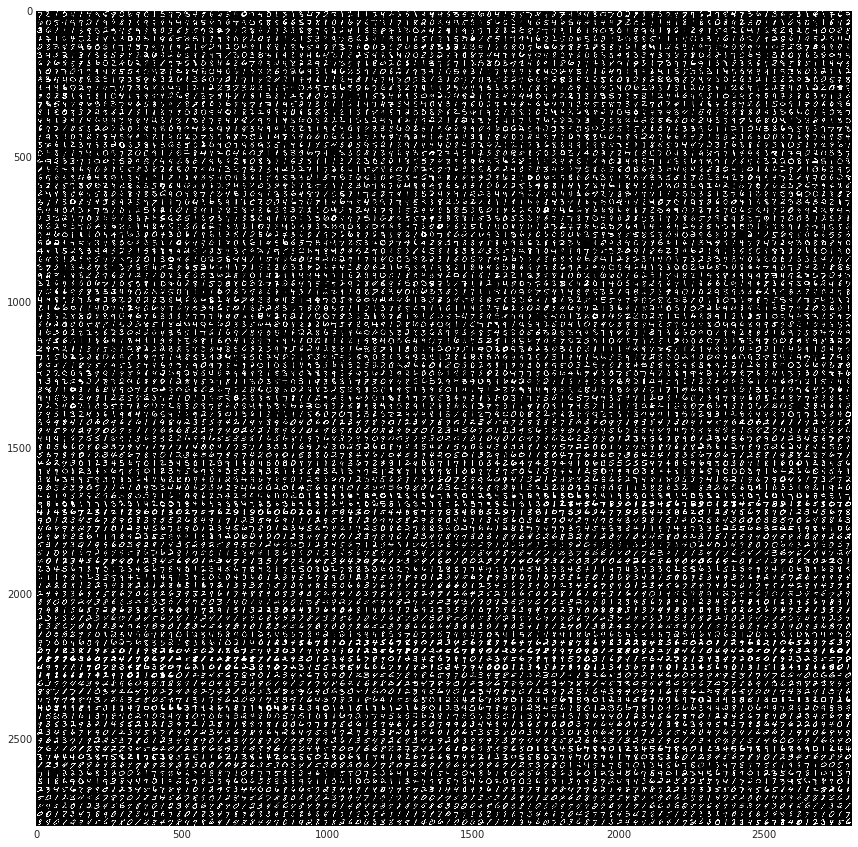

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(atlas)

In [9]:
predictions = model.predict(x_test)
predictions[:4]

array([[  1.93809066e-11,   5.02539468e-11,   3.98403586e-08,
          1.17598180e-08,   2.09022643e-11,   8.47300908e-13,
          3.64874773e-15,   1.00000000e+00,   2.43892267e-10,
          1.22517854e-08],
       [  5.69318068e-08,   1.69568295e-06,   9.99998212e-01,
          1.41692853e-08,   1.13375130e-12,   5.65150531e-12,
          1.29256108e-07,   7.17268467e-11,   1.65711578e-09,
          1.92028319e-13],
       [  1.56600095e-07,   9.99903202e-01,   9.17481611e-06,
          3.69349848e-08,   3.59613041e-05,   1.46727350e-08,
          1.07286110e-06,   4.79915252e-05,   2.32050706e-06,
          9.46810559e-08],
       [  9.99988079e-01,   3.04072842e-06,   1.83460187e-07,
          3.62142067e-08,   4.27161204e-08,   1.01992917e-07,
          6.90695424e-06,   9.93864205e-07,   3.11587684e-07,
          4.20482763e-07]], dtype=float32)

In [10]:
predictions = np.argmax(predictions, axis=1) # Reverse one hot
predictions[:4]

array([7, 2, 1, 0])

In [12]:
y_test = np.argmax(y_test, axis=1)
y_test[:4]

array([7, 2, 1, 0])

In [13]:
df = pd.DataFrame({"prediction": predictions, "actual": y_test})
df.head(2)

,actual,prediction
0,7,7
1,2,2


In [14]:
jsonstr = df.to_json(orient='records')

In [15]:
jsonstr[1:28]

'{"actual":7,"prediction":7}'

In [16]:
# Display the Dive visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <head>
        <link rel="import" href="./facets-jupyter.html"></link>
        </head>
        <facets-dive id="elem" height="800" sprite-image-width="28" sprite-image-height="28" atlas-url="atlas.jpg"></facets-dive>
        <script>
          var data = JSON.parse('{jsonstr}');
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)

html = HTML(html).data
with open('html_file.html', 'w') as f:
    f.write(html)

display(HTML(html))